In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [17]:
data= pd.read_csv('USA_Housing.csv')

In [18]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [19]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [21]:
data.shape

(5000, 7)

In [22]:
data.describe


<bound method NDFrame.describe of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0       

In [23]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [25]:
data.describe(include='object')

,Address
count,5000
unique,5000
top,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,1


In [27]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [29]:
data.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [30]:
data.isna()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [32]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [33]:
numerical_data = data.select_dtypes(include=np.number).columns
# numerical_data
for col in numerical_data:
    print(data[col].value_counts())
    print()
    print('---------------------------------------------------------')

Avg. Area Income
79545.458574    1
68735.436608    1
71635.473101    1
73211.136245    1
86249.993070    1
               ..
66064.532823    1
59390.346824    1
64661.930276    1
73279.030904    1
65510.581804    1
Name: count, Length: 5000, dtype: int64

---------------------------------------------------------
Avg. Area House Age
5.682861    1
7.721909    1
5.866996    1
6.501139    1
6.155403    1
           ..
6.659562    1
5.664971    1
4.656696    1
5.902296    1
5.992305    1
Name: count, Length: 5000, dtype: int64

---------------------------------------------------------
Avg. Area Number of Rooms
7.009188     1
7.621975     1
6.075987     1
10.280022    1
7.967184     1
            ..
6.881398     1
6.750872     1
5.660253     1
8.077578     1
6.792336     1
Name: count, Length: 5000, dtype: int64

---------------------------------------------------------
Avg. Area Number of Bedrooms
4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.31     7
6.01     6
6.02  

In [41]:
data.drop('Address', axis=1, inplace=True)

In [42]:
data.shape

(5000, 6)

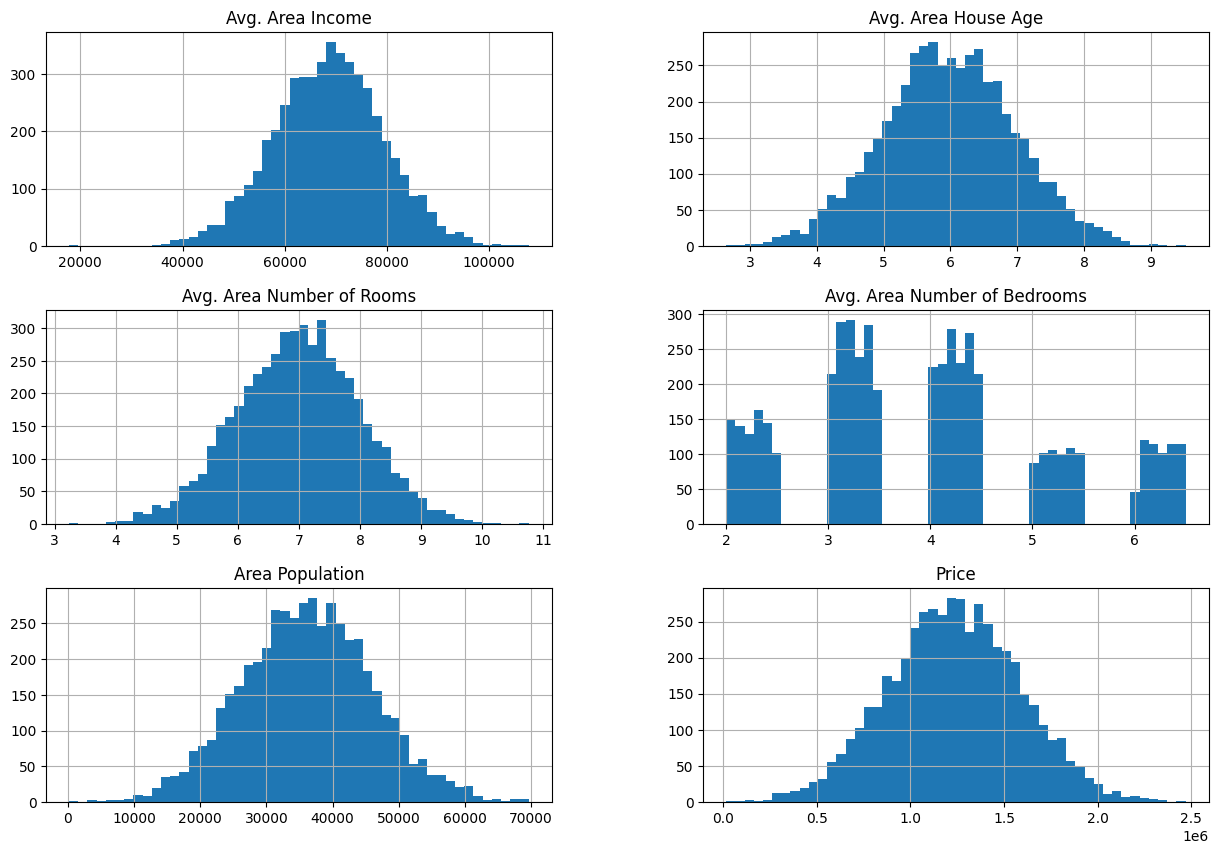

In [45]:
data.hist(figsize=(15,10), bins=50)
plt.show()

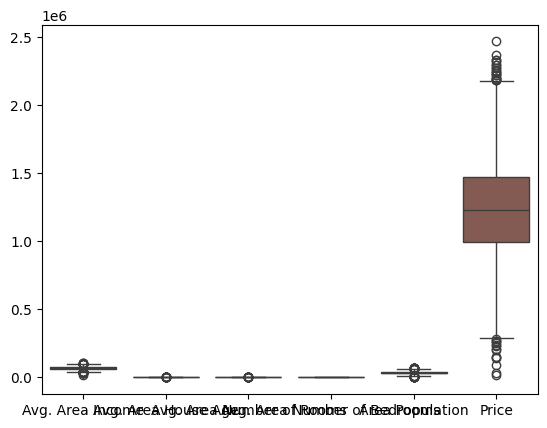

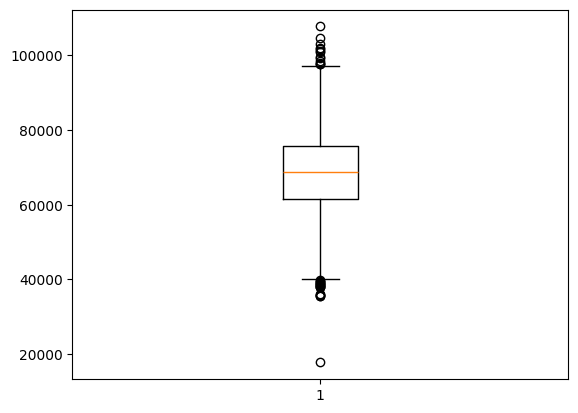

In [46]:
    sns.boxplot(data)
    plt.show()
    plt.boxplot(data['Avg. Area Income'])
    plt.show()
 

In [47]:
print(data[(data['Avg. Area Income'] > 97000) | (data['Avg. Area Income'] < 40000)])
print(len(data[(data['Avg. Area Income'] > 97000) | (data['Avg. Area Income'] < 40000)]))
print(data[(data['Avg. Area Income'] > 97000) | (data['Avg. Area Income'] < 40000)].index)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
12        39033.809237             7.671755                   7.250029   
39        17796.631190             4.949557                   6.713905   
411       36100.444227             5.778489                   5.497450   
428       97112.361252             5.914725                   6.133646   
558       99629.013581             5.431863                   7.351398   
693      107701.748378             7.143522                   8.518608   
844       39411.652788             4.385845                   7.047435   
962      101928.858060             4.829586                   9.039382   
1096      97548.310413             5.460973                   6.609396   
1271      37971.207566             4.291224                   5.807510   
1459      35963.330809             3.438547                   8.264122   
1597      39294.036523             5.928585                   5.960676   
1734     104702.724257             5.5

In [48]:
data.drop(index=[  12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459, 1597,
       1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144, 3183, 3483,
       3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844, 4855],axis=0, inplace=True)

In [49]:
data.shape

(4966, 6)

In [50]:
df=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

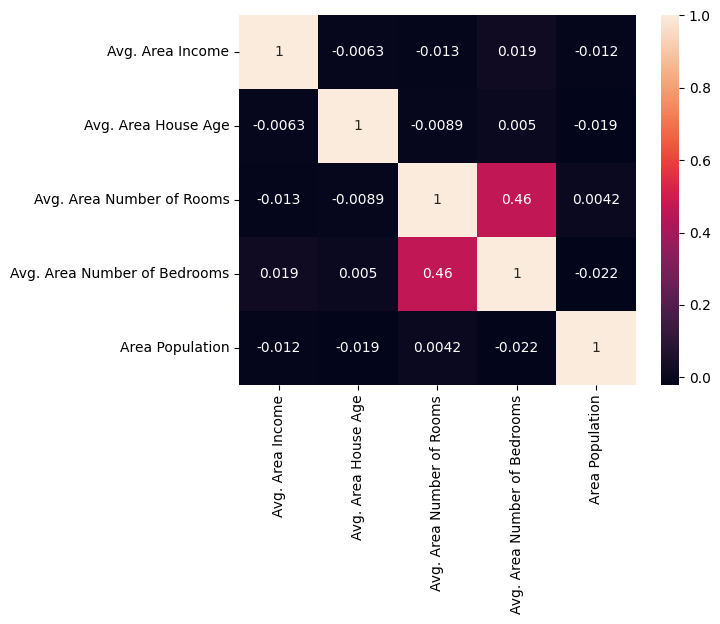

In [51]:
sns.heatmap(df.corr(), annot=True)
plt.show()

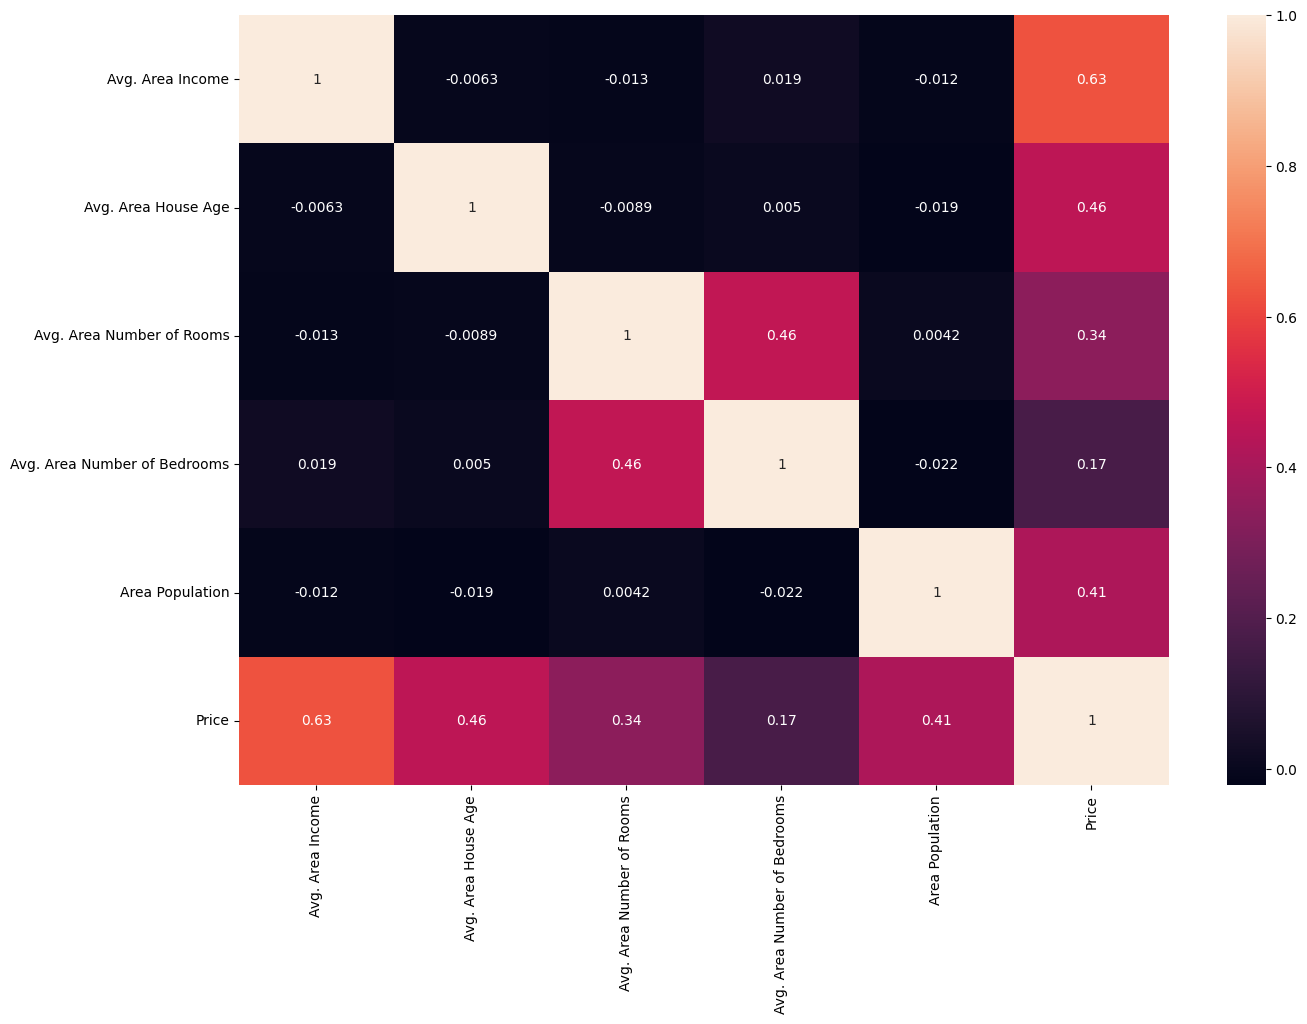

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [52]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [54]:
x=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [55]:
y=data[['Price']]

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [62]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2502,55306.141974,6.125857,6.410318,4.06,32142.947348
2770,84802.787605,5.101614,7.844812,6.04,35748.331474
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
82,82061.565204,4.182828,5.963032,4.10,36271.408496
809,66556.387650,6.321891,8.369451,4.21,45325.655862
...,...,...,...,...,...
4456,61660.272289,6.986938,6.262992,3.12,50291.359949
470,85719.315623,4.537668,6.029204,3.19,32058.356241
3113,74791.016755,6.113429,7.480409,6.45,29153.799650
3797,56348.353343,6.336787,4.891681,2.20,23476.973603


In [63]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3160,65803.600647,6.730870,7.063988,4.06,36011.051169
1978,61687.869796,5.418325,7.334992,3.48,34760.760268
1354,43952.336214,5.416065,7.327671,4.41,25139.449944
3004,86084.335231,6.143843,6.776068,4.33,24447.106696
4944,64938.752493,5.089792,7.162307,6.13,34736.080244
...,...,...,...,...,...
425,51718.354612,7.509044,7.109312,3.11,49639.173237
97,75394.759582,6.933352,7.834100,4.48,22268.075306
4903,56161.346123,6.425913,7.065434,5.37,46485.051182
4940,83714.109245,6.314355,7.519223,4.41,28369.938123


In [64]:
y_train

,Price
2502,6.479827e+05
2770,1.437984e+06
2521,1.063964e+06
82,1.102821e+06
809,1.780415e+06
...,...
4456,1.347904e+06
470,1.187609e+06
3113,1.518706e+06
3797,6.492235e+05


In [65]:
y_test

,Price
3160,1.306288e+06
1978,9.919341e+05
1354,3.249820e+05
3004,1.460045e+06
4944,1.058611e+06
...,...
425,1.285924e+06
97,1.498641e+06
4903,1.140188e+06
4940,1.524622e+06


In [68]:
lr=LinearRegression()

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
y_train_pred=lr.predict(x_train)

In [71]:
y_test_pred=lr.predict(x_test)

In [79]:
y_train

,Price
2502,6.479827e+05
2770,1.437984e+06
2521,1.063964e+06
82,1.102821e+06
809,1.780415e+06
...,...
4456,1.347904e+06
470,1.187609e+06
3113,1.518706e+06
3797,6.492235e+05


In [76]:
y_train_pred

array([[ 838521.68881125],
       [1537885.93430882],
       [ 972616.39243315],
       ...,
       [1346190.98263516],
       [ 578377.19734588],
       [ 811248.84377673]])

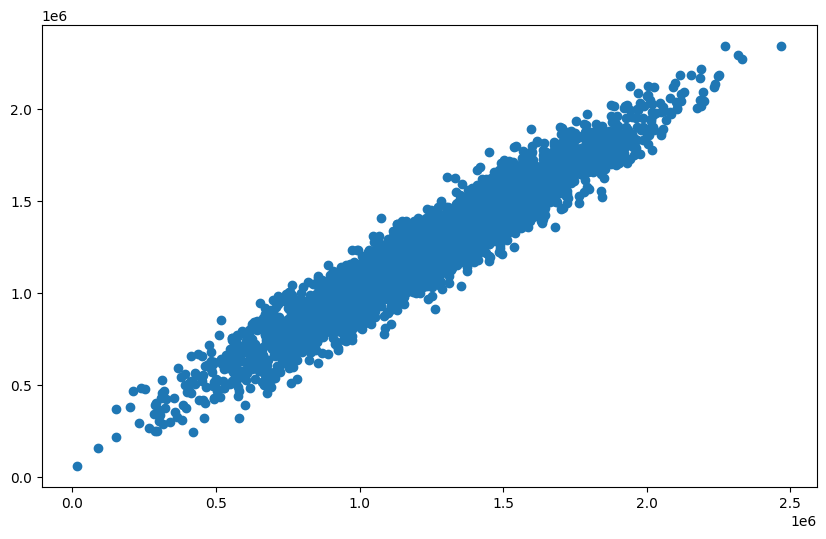

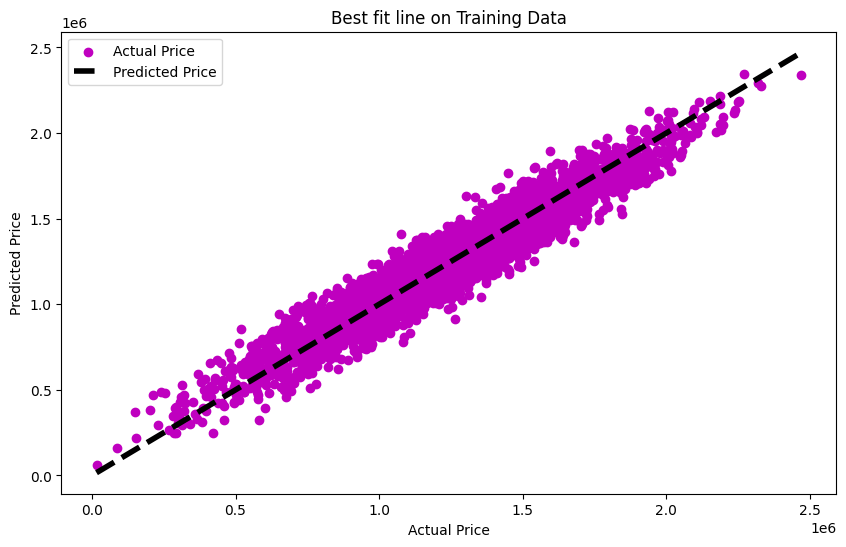

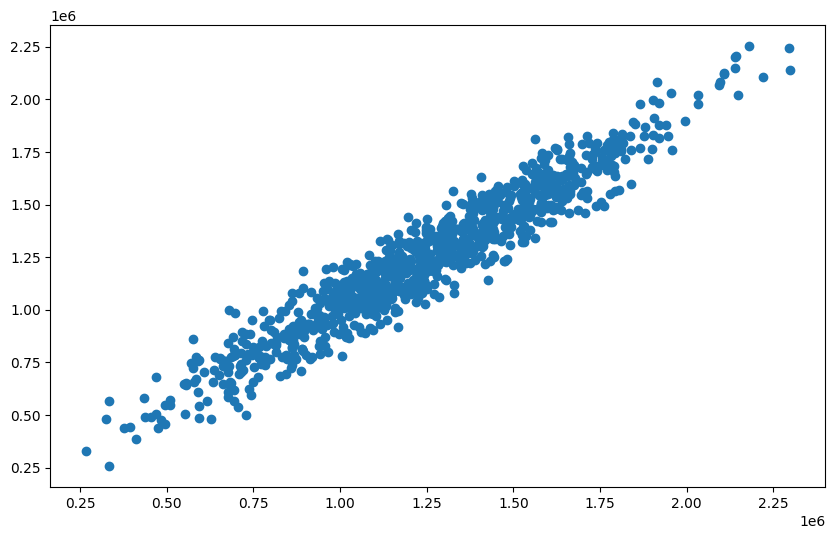

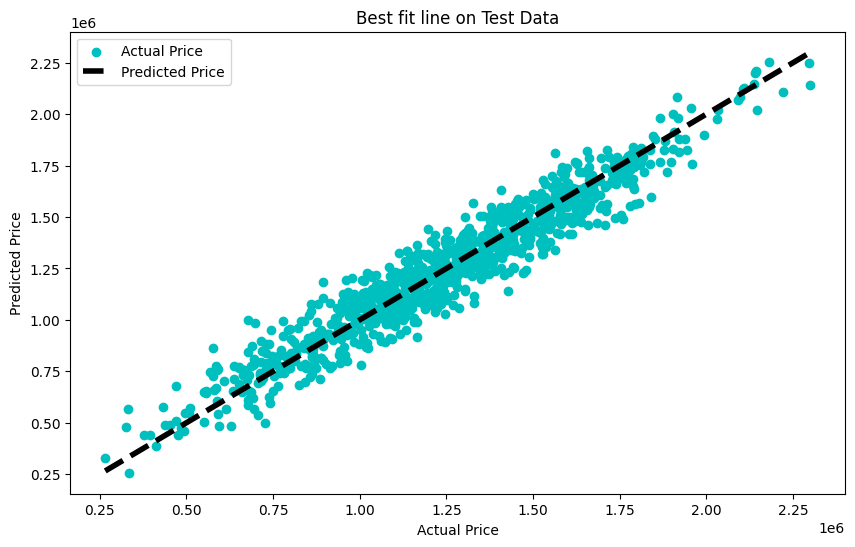

In [80]:
plt.figure(figsize=(10,6))#best fit line for train data
plt.scatter(y_train, y_train_pred)
plt.show()
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred, color='m', label='Actual Price')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4, label='Predicted Price')
plt.title('Best fit line on Training Data')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_test_pred)
plt.show()
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, color='c', label='Actual Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Predicted Price')
plt.title('Best fit line on Test Data')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [83]:
mse=mean_squared_error(y_train,y_train_pred)
mae=mean_absolute_error(y_train,y_train_pred)
r2=r2_score(y_train,y_train_pred)
rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))
print('MSE:\n',mse)
print('RMSE:\n',rmse)
print('MAE:\n',mae)
print('R2_score:',r2)

MSE:
 10268623193.67436
RMSE:
 101334.21531582686
MAE:
 81605.20894176637
R2_score: 0.9161466729297922


In [84]:
mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
r2=r2_score(y_test,y_test_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
print('MSE:\n',mse)
print('RMSE:\n',rmse)
print('MAE:\n',mae)
print('R2_score:',r2)

MSE:
 9769360588.245779
RMSE:
 98840.0758207205
MAE:
 79388.31116422213
R2_score: 0.9180015018430217
